In [1]:
import scipy as sp
import scipy.interpolate
file = open("salt2_template_1.dat")
lines = file.readlines()
file.close()
    
xtemp = []
ytemp = []
ztemp = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xtemp.append(co[0])
    ytemp.append(co[1])
    ztemp.append(co[2])

In [2]:
import numpy as np

xtemp = np.array(xtemp, dtype=float)
ytemp = np.array(ytemp, dtype=float)
ztemp = np.array(ztemp, dtype=float)

In [3]:
print(xtemp)
print(ytemp)
print(ztemp)

[-20. -20. -20. ...  50.  50.  50.]
[2000. 2010. 2020. ... 9180. 9190. 9200.]
[0.         0.         0.         ... 0.01562876 0.01553518 0.01540527]


In [4]:
ztemp = ztemp/max(ztemp)

In [5]:
import scipy.interpolate as interp

gradex,gradey = np.meshgrid(np.linspace(min(xtemp),max(xtemp),71),np.linspace(min(ytemp),max(ytemp),721))

f = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='linear')


In [6]:
print(f)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.28546261e-04  5.46242856e-04 ...  7.29630573e-06
  -8.60836898e-06 -2.87979131e-05]
 [ 0.00000000e+00  5.15370094e-04  2.19000716e-03 ...  2.92524866e-05
  -3.45128353e-05 -1.15457136e-04]
 ...
 [ 0.00000000e+00  5.48536373e-02  2.33094353e-01 ...  1.07475351e-01
   8.40212092e-02  5.86661800e-02]
 [ 0.00000000e+00  5.64619130e-02  2.39928539e-01 ...  1.09379987e-01
   8.48342406e-02  5.83148904e-02]
 [ 0.00000000e+00  5.80492785e-02  2.46673870e-01 ...  1.11174467e-01
   8.55243370e-02  5.78272699e-02]]


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
'''
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0salt'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)
'''

"\nfig = plt.figure()\nax = Axes3D(fig)\nplt.xlabel('time (days)')\nplt.ylabel('wavelength ($\\AA$)')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=True)\n    return fig,\n\ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)\n\nfn = 'M0salt'\n\nani.save(fn+'.gif',writer='imagemagick',fps=1000/50)\n"

In [8]:
file = open("var.dat")
lines = file.readlines()
file.close()
    
xsub = []
ysub = []
zsub = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xsub.append(co[0])
    ysub.append(co[1])
    zsub.append(co[2])

In [9]:
xsub = np.array(xsub, dtype=float)
ysub = np.array(ysub, dtype=float)
zsub = np.array(zsub, dtype=float)

In [10]:
xsubn = []
ysubn = []
zsubn = []


for i in range(0,len(zsub)):
    
    if -3 < xsub[i] < 3:
        
        if 3900 < ysub[i] < 4100:
            
            xsubn.append(xsub[i])
            ysubn.append(ysub[i])
            zsubn.append(zsub[i])

In [11]:
zsub

array([0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 8.95915e-05,
       6.01198e-05, 6.21533e-05])

In [12]:
#zsubn = (zsubn/max(zsubn))*100

In [13]:
zsub = zsub/max(zsub)

In [14]:
fsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='linear')

In [15]:
gradey

array([[2000., 2000., 2000., ..., 2000., 2000., 2000.],
       [2010., 2010., 2010., ..., 2010., 2010., 2010.],
       [2020., 2020., 2020., ..., 2020., 2020., 2020.],
       ...,
       [9180., 9180., 9180., ..., 9180., 9180., 9180.],
       [9190., 9190., 9190., ..., 9190., 9190., 9190.],
       [9200., 9200., 9200., ..., 9200., 9200., 9200.]])

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
'''
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, fsub, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0my'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

'''

"\nfig = plt.figure()\nax = Axes3D(fig)\nplt.xlabel('time (days)')\nplt.ylabel('wavelength ($\\AA$)')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(gradex, gradey, fsub, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=True)\n    return fig,\n\ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)\n\nfn = 'M0my'\n\nani.save(fn+'.gif',writer='imagemagick',fps=1000/50)\n\n"

In [17]:
xx_temp = np.linspace(min(xtemp),max(xtemp),71)
yy_temp = np.linspace(min(ytemp),max(ytemp),721)

In [18]:
xx_temp

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.])

In [19]:
supref = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='cubic')

In [20]:
supsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='cubic')

In [21]:
len(supsub[0])

71

In [22]:
import math
xx = []
yy = []
zz = []
for i in range(0,len(xx_temp)):
    for j in range(0,len(yy_temp)):
        
        if math.isnan(supref[j][i]) == False and math.isnan(supsub[j][i]) == False and supref[j][i] != 0:
            
            xx.append(xx_temp[i])
            yy.append(yy_temp[j])
            zz.append(abs((supref[j][i] - supsub[j][i])/supref[j][i]))

In [23]:
len(yy)

36661

In [24]:
gradex,gradey = np.meshgrid(np.linspace(-10,50,61),np.linspace(3300,7500,521))

fcomp = interp.griddata((xx,yy),zz,(gradex,gradey),method='linear')

In [25]:
len(gradey)

521

<IPython.core.display.Javascript object>


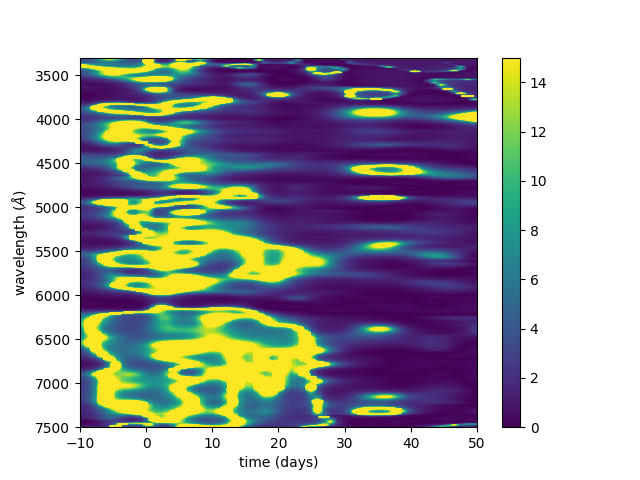

In [36]:
import matplotlib.cm as cm
import numpy as np
%matplotlib notebook
#x, y, z = np.loadtxt('density.dat', unpack=True)
#z = z.reshape(50,50)
plt.imshow(fcomp, extent=(np.amin(gradex), np.amax(gradex), np.amax(gradey), np.amin(gradey)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,15)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()


In [27]:
np.amin(gradex)

-10.0

In [28]:
x_grid = np.linspace(-20,50,71)
y_grid = np.linspace(2000,9200,721)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

<IPython.core.display.Javascript object>


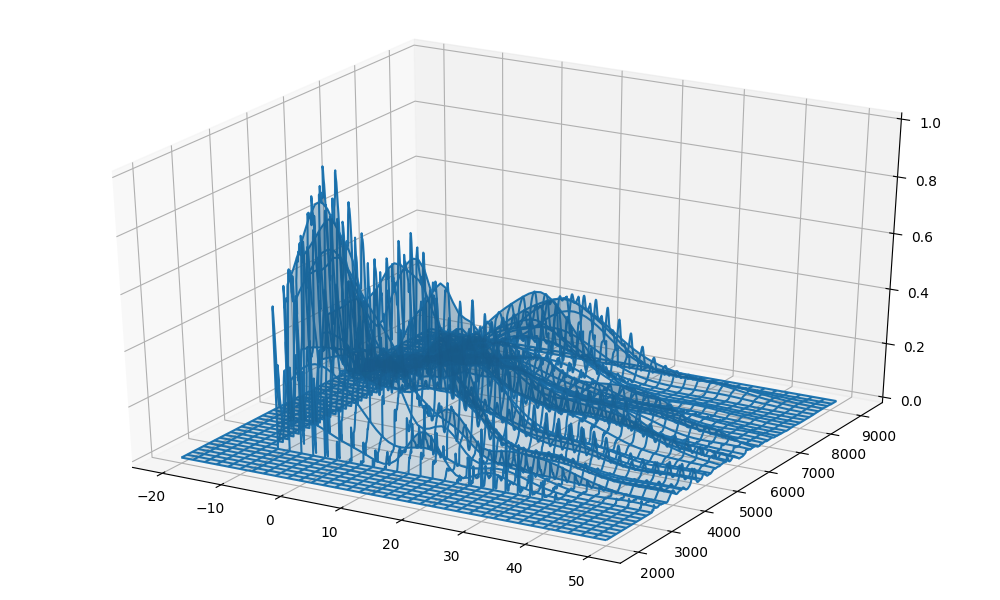

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp
Z = interp.griddata((xsub,ysub),zsub,(B1,B2),method='cubic',fill_value = 0,rescale=True)
#Z = splinemean(B1, B2)
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
#ax.scatter3D(xx_test,yy_test,mean_flux, c='r')
#ax.set_xlim(-10, 50)
#ax.set_ylim(-10, 50)
#ax3.set_zlim(-1, 1)

plt.show()

In [30]:
diff = []

In [31]:
'''
for i in range(0,len(xsub)):        
    print(i)
    idxx = [k for k, e in enumerate(xtemp) if e == xsub[i]]
    idxy = [k for k, e in enumerate(ytemp) if e == ysub[i]]
        
    intersection = list(set(idxx).intersection(idxy))
        
    diff.append((zsub[i] - ztemp[intersection[0]])/ztemp[intersection[0]])
'''

'\nfor i in range(0,len(xsub)):        \n    print(i)\n    idxx = [k for k, e in enumerate(xtemp) if e == xsub[i]]\n    idxy = [k for k, e in enumerate(ytemp) if e == ysub[i]]\n        \n    intersection = list(set(idxx).intersection(idxy))\n        \n    diff.append((zsub[i] - ztemp[intersection[0]])/ztemp[intersection[0]])\n'

In [32]:
zdiff = np.reshape(diff, (601, 61))

ValueError: cannot reshape array of size 0 into shape (601,61)

In [ ]:
import matplotlib.cm as cm
import numpy as np
%matplotlib notebook
#x, y, z = np.loadtxt('density.dat', unpack=True)
#z = z.reshape(50,50)
plt.imshow(zdiff, extent=(-10, 60, 3000, 9000), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,1)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()
